# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, Y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
Y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

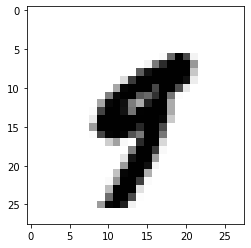

In [5]:
import matplotlib.pyplot as plt

X_img= X[36000].reshape(28,28)

plt.imshow(X_img,cmap = plt.cm.binary,interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
Y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:


X_train= X[:60000]
y_train= Y[:60000]

X_test= X[60000:]
y_test= Y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:


# your code here
y_train = np.where(y_train == '5',5, 0)
y_test = np.where(y_test == '5', 5, 0)


print(y_train)
print(y_test)

[5 0 0 ... 5 0 0]
[0 0 0 ... 0 5 0]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_train)

/home/marodenas/miniconda3/envs/test_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([5, 0, 0, ..., 5, 0, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
y_pred_t = lr.predict(X_train)
y_pred_t[36000] == y_train[36000]
#yes, te model predict all the numbers

True

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, Y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
never_5_clf.fit(X_train, y_train)
never_5_clf.predict(X_test).shape

(10000, 1)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [14]:
# your code here


from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
display(confusion_matrix(y_test, lr.predict(X_test)))
display(confusion_matrix(y_test, never_5_clf.predict(X_test)))



array([[9034,   74],
       [ 147,  745]])

array([[9108,    0],
       [ 892,    0]])

In [15]:
display(precision_score(y_test, lr.predict(X_test), average='weighted'))
display(precision_score(y_test, never_5_clf.predict(X_test), average='weighted'))

0.9773572978329322

/home/marodenas/miniconda3/envs/test_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.82955664

In [16]:
display(recall_score(y_test, lr.predict(X_test),pos_label=5))

display(recall_score(y_test, never_5_clf.predict(X_test),pos_label=5))

0.8352017937219731

0.0

In [17]:


display(f1_score(y_test, lr.predict(X_test),pos_label=5))
display(f1_score(y_test, never_5_clf.predict(X_test),pos_label=5))



0.8708357685563999

0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [22]:
# The Never5Classifier perfectly identifies the 0's, but the 5's are identified as false positives.
# The LR model is more accurate

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

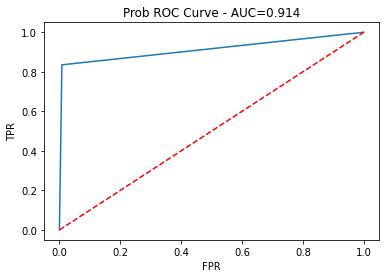

In [18]:


y_pred=lr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();




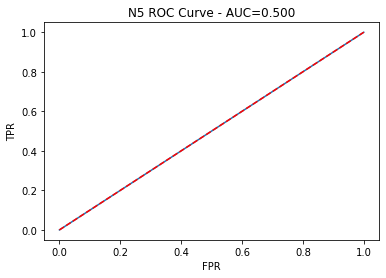

In [19]:


y_pred=never_5_clf.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'N5 ROC Curve - AUC={a:.3f}')
plt.show();



### Now find the roc_auc_score for each. 

In [20]:
y_pred=never_5_clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

y_pred=lr.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5


0.9135385341029717

### What does this metric tell you? Which classifier works better with this metric in mind?

In [21]:
#The Logistic Regression predicts with more acuracy thant never 5